### Problem Statement:

**Context**:
The Gurugram-based FlipItNews aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective**:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

### Attribute Information:

* Article
* Category

The feature names are themselves pretty self-explanatory.

### Our Approach:

1. Importing the libraries
2. Loading the dataset
3. Data Exploration
  * Shape of the dataset
  * News articles per category
4. Text Processing
  * Removing the non-letters
  * Tokenizing the text
  * Removing stopwords
  * Lemmatization
5. Data Transformation
  * Encoding the target variable
  * Bag of Words
  * TF-IDF
  * Train-Test Split
6. Model Training & Evaluation
  * Simple Approach
    * Naive Bayes
  * Functionalized Code
    * Decision Tree
    * Nearest Neighbors
    * Random Forest

#### 1. Importing the libraries

In [1]:
import pandas as pd

In [2]:
# To ignore all warnings
import warnings

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
# !pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


#### 2. Loading the dataset

In [3]:
df = pd.read_csv('flipitnews-data.csv')

#### 3. Data Exploration

In [4]:
print('No. of rows: {}'.format(df.shape[0]))

No. of rows: 2225


There are 2225 news articles in the dataset

In [5]:
print('No. of unique rows: {}'.format(df.nunique()[1]))

No. of unique rows: 2126


Now lets see the duplicated rows and remove them

In [6]:
df[df.duplicated()]

,Category,Article
85,Politics,hague given up his pm ambition former conser...
301,Politics,fox attacks blair s tory lies tony blair lie...
496,Technology,microsoft gets the blogging bug software giant...
543,Business,economy strong in election year uk businesse...
582,Entertainment,ray dvd beats box office takings oscar-nominat...
...,...,...
2206,Politics,kennedy questions trust of blair lib dem leade...
2207,Technology,california sets fines for spyware the makers o...
2213,Technology,progress on new internet domains by early 2005...
2215,Technology,junk e-mails on relentless rise spam traffic i...


In [7]:
df.drop_duplicates(inplace= True)

In [8]:
print('No. of unique rows: {}'.format(df.shape[0]))
print('No. of Categories: {}'.format(df.nunique()[0]))

No. of unique rows: 2126
No. of Categories: 5


#### Number of news articles per category

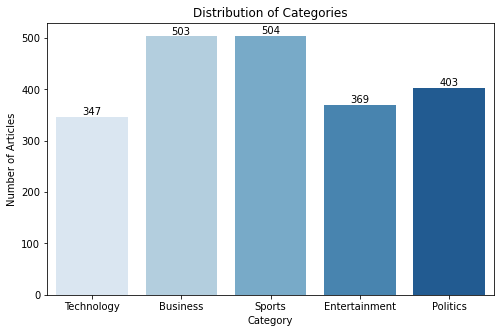

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Category'], palette='Blues')

ax.bar_label(ax.containers[0])

ax.set_title('Distribution of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')

plt.show()

Sports and Busiess Category have more news articles

#### Text Processing

Before Processing

In [10]:
df['Article']

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: Article, Length: 2126, dtype: object

This is how a single news article in our dataset looks before processing.
We can see that everything is already in lower case so we don't need to do that explicitly.

In [11]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
stop_words = list(stopwords.words("english"))

def text_process(sent):
  # Removing non-letters
  sent = re.sub('[^a-zA-Z]', ' ', sent)

  # Word tokenizing the text
  words = nltk.word_tokenize(sent)

  # Removing stopwords
  filtered_sent = [w for w in words if not w in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  new_txt = [lemmatizer.lemmatize(word) for word in filtered_sent]
  new_txt = " ".join(new_txt)

  return new_txt

df['Article'] = df['Article'].apply(text_process)


After Processing

In [13]:
df['Article']

0       tv future hand viewer home theatre system plas...
1       worldcom bos left book alone former worldcom b...
2       tiger wary farrell gamble leicester say rushed...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raid box office ocean twelve crim...
                              ...                        
2220    car pull u retail figure u retail sale fell ja...
2221    kilroy unveils immigration policy ex chatshow ...
2222    rem announce new glasgow concert u band rem an...
2223    political squabble snowball become commonplace...
2224    souness delight euro progress bos graeme soune...
Name: Article, Length: 2126, dtype: object

This is what an article obtained after text processing looks like.

#### Data Transformation

**Encoding the target variable -**

In [14]:
encode = ce.OrdinalEncoder(cols=['Category'])
df = encode.fit_transform(df)

**Outcome labels after encoding -**

Category:

1 - Technology

2 - Business

3 - Sports

4 - Entertainment

5 - Politics

**Bag of Words / TF-IDF**

We can use either BoW or TF-IDF
* BoW
* TF-IDF

In [15]:
choice = int(input("Choose \n (1) If you want to use Bag of Words \n (2) If you want to use TF-IDF \n Choice: "))

if choice == 1:
  cv = CountVectorizer(max_features=5000)
  X = cv.fit_transform(df.Article).toarray()
  y = np.array(df['Category'].values)

elif choice == 2:
  tf_idf = TfidfVectorizer()
  X = tf_idf.fit_transform(df.Article).toarray()
  y = np.array(df['Category'].values)

else:
  print("Wrong Input!")

Choose 
 (1) If you want to use Bag of Words 
 (2) If you want to use TF-IDF 
 Choice: 2


Performing train-test split -

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,
                                                  shuffle=True, stratify=y,
                                                  random_state=42)

Final shape of the train & test set.

In [17]:
print("No. of rows in train set is {}.".format(X_train.shape[0]))
print("No. of rows in test set is {}.".format(X_val.shape[0]))

No. of rows in train set is 1700.
No. of rows in test set is 426.


### Simple Approach -

First, we'll follow a basic approach to create a model for this multi-class classification problem.

#### **Naive Bayes Classifier**

The very first ML algorithm that we'll be trying is Naive Bayes Classifier.

In [18]:
# Training the model -
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [32]:
print("------------{}-------------".format('Naive Bayes'))

# Calculating the train & test accuracy -
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy :{:.3f}".format(nb_train))
print("Test accuracy :{:.3f}\n".format(nb_test))

# Making predictions on the test set -
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

# Computing the ROC AUC score -
print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')))

# Computing the precision, recall & f1 score -
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

------------Naive Bayes-------------
Train accuracy :0.988
Test accuracy :0.965

ROC AUC Score: 0.998

Precision: 0.966
Recall: 0.965
F1 Score: 0.965


Plotting the Confusion Matrix -

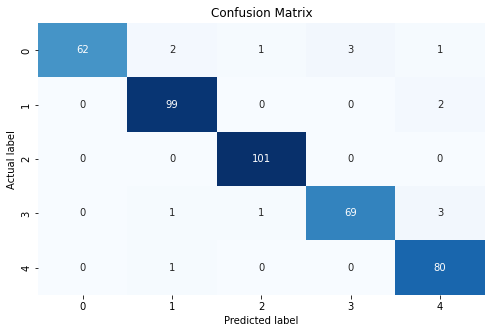

In [23]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

Printing the Classification Report -

In [24]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        69
           2       0.96      0.98      0.97       101
           3       0.98      1.00      0.99       101
           4       0.96      0.93      0.95        74
           5       0.93      0.99      0.96        81

    accuracy                           0.96       426
   macro avg       0.97      0.96      0.96       426
weighted avg       0.97      0.96      0.96       426



### Functionalized Code -

Now, we'll try to functionalize the above code so that we can use it for a few more different models.

#### Model Training

In [25]:
def model_train(obj):
  obj.fit(X_train, y_train) # Training the model
  y_pred = obj.predict(X_val) # Making predictions
  y_pred_proba = obj.predict_proba(X_val)
  return y_pred, y_pred_proba

#### Model Evaluation

In [26]:
def model_eval(obj, y_pred, y_pred_proba,model_name):
  print("------------{}-------------".format(model_name))
  
  # Calculating the train & test accuracy
  train_acc = accuracy_score(y_train, obj.predict(X_train))
  test_acc = accuracy_score(y_val, obj.predict(X_val))

  print("Train Accuracy: {:.3f}".format(train_acc))
  print("Test Accuracy: {:.3f}\n".format(test_acc))

  # Computing the ROC AUC score
  print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

  # Computing the precision, recall & f1 score
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')

  print("Precision: {:.3f}".format(precision))
  print("Recall: {:.3f}".format(recall))
  print("F1 Score: {:.3f}".format(f1))

  print("-------------------------")

Now, let us try out a few more different ML algorithm to see how they perform for this problem, on this dataset.

**Decision Tree Classifer**

In [27]:
# Creating the model object -
dt = DecisionTreeClassifier()

# Training the model -
y_pred_dt, y_pred_proba_dt = model_train(dt)

# Evaluatong the model -
model_eval(dt, y_pred_dt, y_pred_proba_dt,'Descision Tree')

------------Descision Tree-------------
Train Accuracy: 1.000
Test Accuracy: 0.819

ROC AUC Score: 0.881

Precision: 0.822
Recall: 0.819
F1 Score: 0.817
-------------------------


**Nearest Neighbors Classifier**

In [28]:
# Creating the model object -
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model -
y_pred_knn, y_pred_proba_knn = model_train(knn)

# Evaluatong the model -
model_eval(knn, y_pred_knn, y_pred_proba_knn, 'KNN')

------------KNN-------------
Train Accuracy: 0.964
Test Accuracy: 0.934

ROC AUC Score: 0.986

Precision: 0.935
Recall: 0.934
F1 Score: 0.934
-------------------------


**Random Forest Classifier**

In [29]:
# Creating the model object -

rf = RandomForestClassifier()

# Training the model -
y_pred_rf, y_pred_proba_rf = model_train(rf)

# Evaluatong the model -
model_eval(rf, y_pred_rf, y_pred_proba_rf,'Randon Forest')

------------Randon Forest-------------
Train Accuracy: 1.000
Test Accuracy: 0.944

ROC AUC Score: 0.997

Precision: 0.947
Recall: 0.944
F1 Score: 0.944
-------------------------


*Observation: Out of all the models tested till now, Naive Bayes Classifier seems to be the best performing one since it gives good train & test accuracy, more than satisfactory precision & recall and almost non-significant overfitting.*

